# MGL 382 Assignment 2

## 1. Problem Statement

The objective of this project is to predict the future stock prices of Apple Inc. (AAPL) up to December 2023, utilizing historical stock data provided. This analysis will help in understanding price trends and aiding investment decisions. The dataset includes daily stock metrics like Open, Close, High, Low, Volume, and Adjusted Close prices. By leveraging machine learning techniques and time series analysis, we aim to develop a predictive model that accurately forecasts stock price movements, thereby facilitating targeted investment strategies.

The columns are:
- Open: This is the price at which the stock first started trading during a trading session. It represents the initial valuation of the stock on that day.

- Close: This is the price at which the stock finished trading at the end of a trading session. It's considered the most crucial price point, as it reflects the final sentiment towards the stock for that day.

- High: This is the highest price the stock reached during the trading session. It shows the peak demand for the stock throughout the day.

- Low: This is the lowest price the stock reached during the trading session. It highlights the weakest point of demand and potential selling pressure.

- Volume: This represents the total number of shares of the stock that were traded during the session. It indicates the level of buying and selling activity for the stock.

- Adj Close (Adjusted Close): This is the closing price adjusted for any corporate actions like stock splits or dividends. It allows for accurate comparison of prices over time, removing the distorting effects of such events


## 2. Hypothesis Generation


- Days with higher trading volume are associated with greater changes in stock price (either increases or decreases).
- Apple's stock closing prices generally increase after significant product launch events.
- Apple’s stock price shows a positive reaction to favorable quarterly earnings reports.

## 3. Getting System Ready and Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('../data/apple_stock.csv')


## 4. Understanding the data

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [5]:
df.shape

(2475, 7)

Able to see that there is 7 different columns with 2475 different values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2475 non-null   object 
 1   Open       2475 non-null   float64
 2   High       2475 non-null   float64
 3   Low        2475 non-null   float64
 4   Close      2475 non-null   float64
 5   Adj Close  2475 non-null   float64
 6   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.5+ KB


Able to distinguish the different data types of our data to proceed

In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No duplicates in the data 

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2475 non-null   datetime64[ns]
 1   Open       2475 non-null   float64       
 2   High       2475 non-null   float64       
 3   Low        2475 non-null   float64       
 4   Close      2475 non-null   float64       
 5   Adj Close  2475 non-null   float64       
 6   Volume     2475 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 135.5 KB


## 5. Data Analysis

In [9]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2475,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,2018-12-01 06:41:27.272727296,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
min,2014-01-02 00:00:00,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,2016-06-16 12:00:00,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,2018-11-29 00:00:00,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,2021-05-17 12:00:00,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,2023-10-31 00:00:00,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09
std,NaN,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07


In [10]:
fig = px.line(df, x='Date', y='Close', title='Apple Stock Closing Prices Over Time',
            labels={'Close': 'Closing Price', 'Date': 'Date'})

fig.show()

c:\Users\Vutomi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


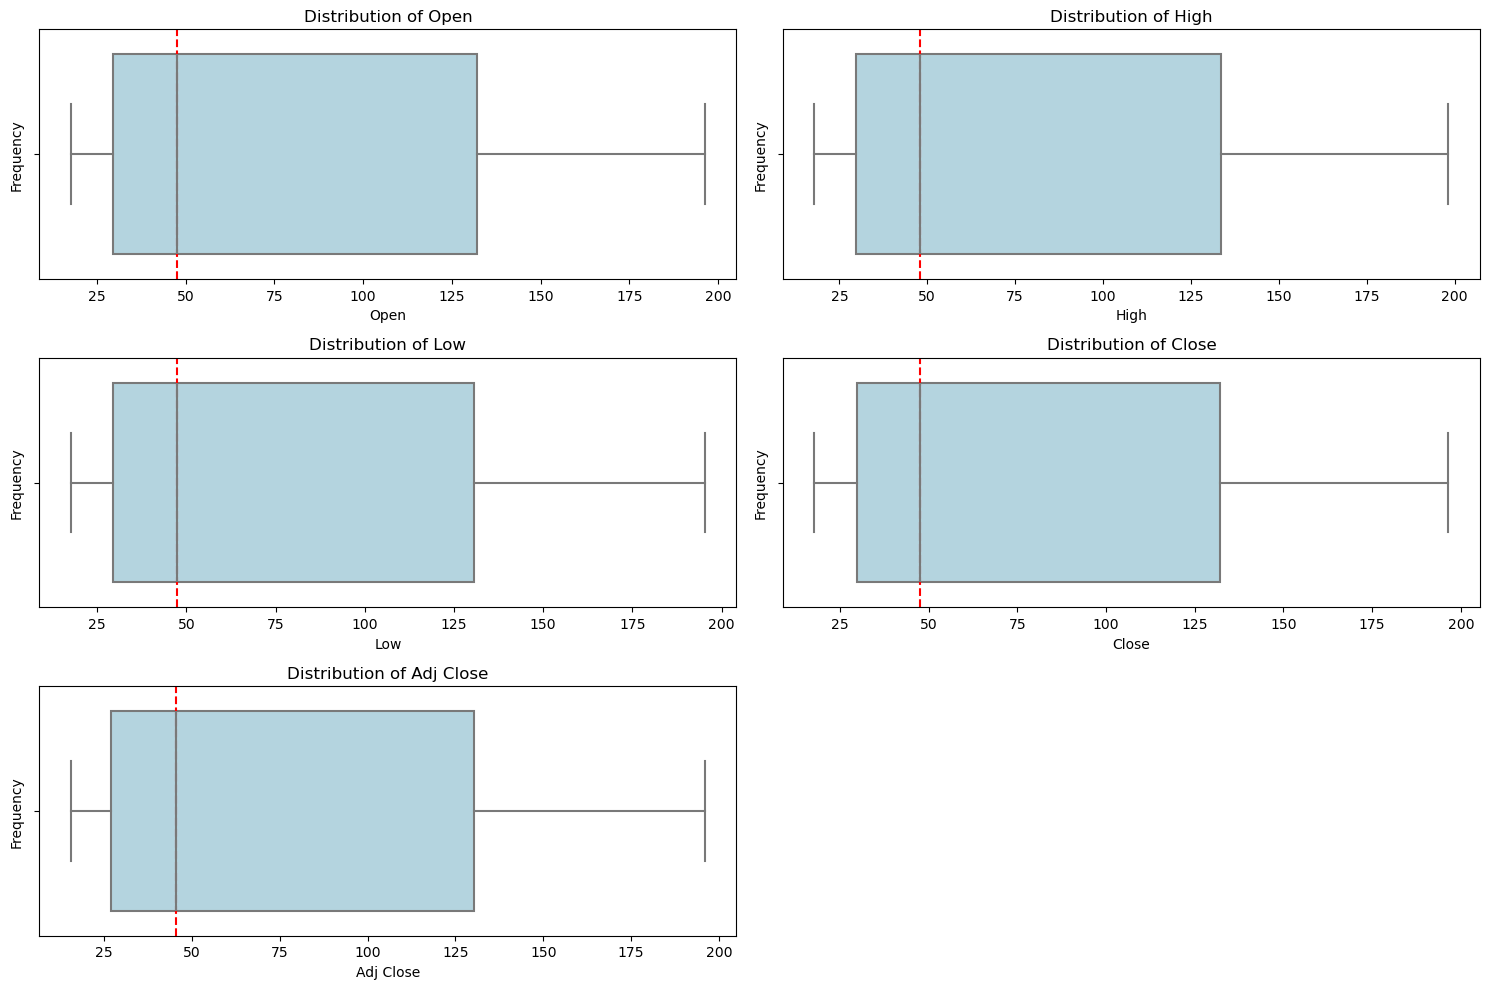

In [11]:

plt.figure(figsize=(15, 10))

columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  
    sns.boxplot(data=df, x=column, color='lightblue')

    # Calculating the median and showing it on plot
    median_value = df[column].median()
    plt.axvline(median_value, color='red', linestyle='--')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


No outliers are present so able to proceed to evaluation metrics

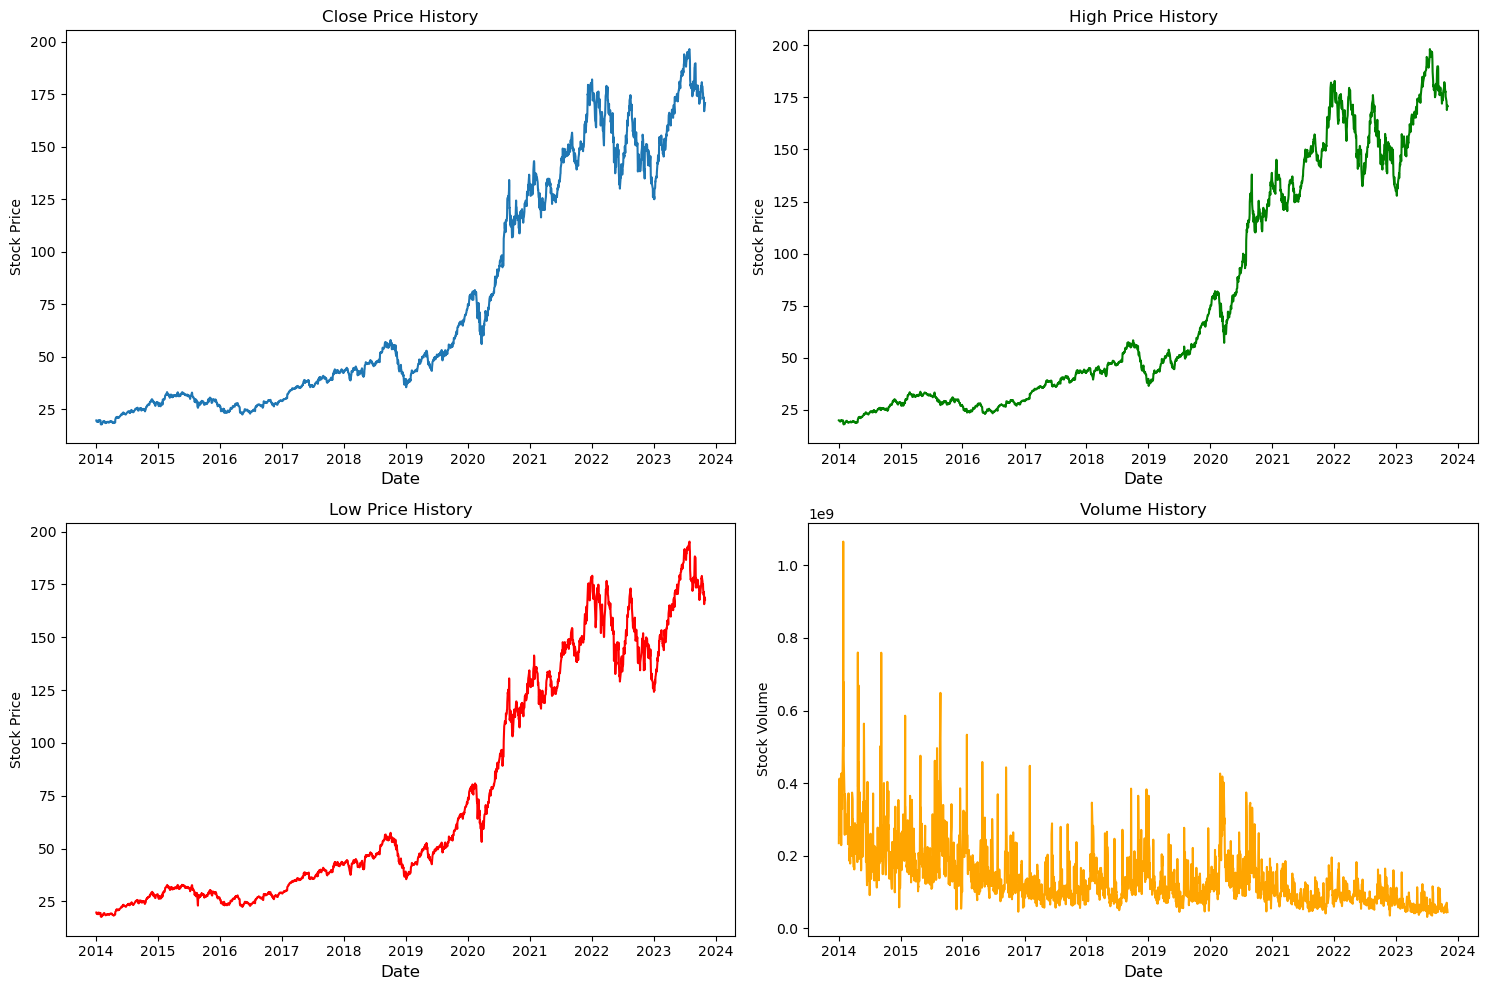

In [12]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))

# First Subplot - Close Price History
axes[0, 0].plot(df['Date'], df['Close'])
axes[0, 0].set_xlabel("Date", fontsize=12)
axes[0, 0].set_ylabel("Stock Price")
axes[0, 0].set_title("Close Price History")

# Second Subplot - High Price History
axes[0, 1].plot(df['Date'], df['High'], color="green")
axes[0, 1].set_xlabel("Date", fontsize=12)
axes[0, 1].set_ylabel("Stock Price")
axes[0, 1].set_title("High Price History")

# Third Subplot - Low Price History
axes[1, 0].plot(df['Date'], df['Low'], color="red")
axes[1, 0].set_xlabel("Date", fontsize=12)
axes[1, 0].set_ylabel("Stock Price")
axes[1, 0].set_title("Low Price History")

# Fourth Subplot - Volume History
axes[1, 1].plot(df['Date'], df['Volume'], color="orange")
axes[1, 1].set_xlabel("Date", fontsize=12)
axes[1, 1].set_ylabel("Stock Volume")
axes[1, 1].set_title("Volume History")

plt.tight_layout()
plt.show()

Further analysis of information to proceed to evaluation

## 6. Evaluation Metrics for Regression


For evaluating regression models predicting stock prices, you typically use metrics that quantify the model's accuracy in predicting continuous values. In this instance metrics like Mean Squared Error (MSE) willbe used on the testing set. It is the average of the squared differences between the actual and the predicted values. Lower the value, the better the regression model.



Split the data into training and a test sets, and calculate the index position to split the data based on lenght of the dataframe(df)

In [15]:
training_size = int(len(df) * 0.8)
training, testing = df.iloc[:training_size], df.iloc[training_size:]

Auto Regressive Intergrated Moving Average(ARIMA) is a popular time series forecasting model that incorporates autoregression, differencing, and moving average components.An ARIMA model is fitted to the training data. The order parameter specifies the order of the ARIMA model. In this case, it's set to (5,1,0), indicating an ARIMA model with a lag of 5, 1 differencing, and no moving average component.

In [17]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(training['Close'], order=(5,1,0))  
model_fitting = model.fit()

After fitting the ARIMA model, this block forecasts future values for the testing set. The forecast() function predicts future values based on the fitted ARIMA model. The steps parameter specifies the number of steps (i.e., the length of the testing set) for which to forecast.

In [20]:
forecast = model_fitting.forecast(steps=len(test))

After obtaining the forecasts, this block evaluates the performance of the ARIMA model. Mean Squared Error (MSE) is calculated as a measure of the model's accuracy in predicting the stock prices. MSE quantifies the average squared difference between the actual and predicted values.

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(testing['Close'], forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 444.8746849848607


The code visualizes the actual and predicted stock prices using a line plot. It plots the actual closing prices from the testing set and overlays the predicted values generated by the ARIMA model. This visualization allows for a visual comparison of the model's predictions against the actual values.

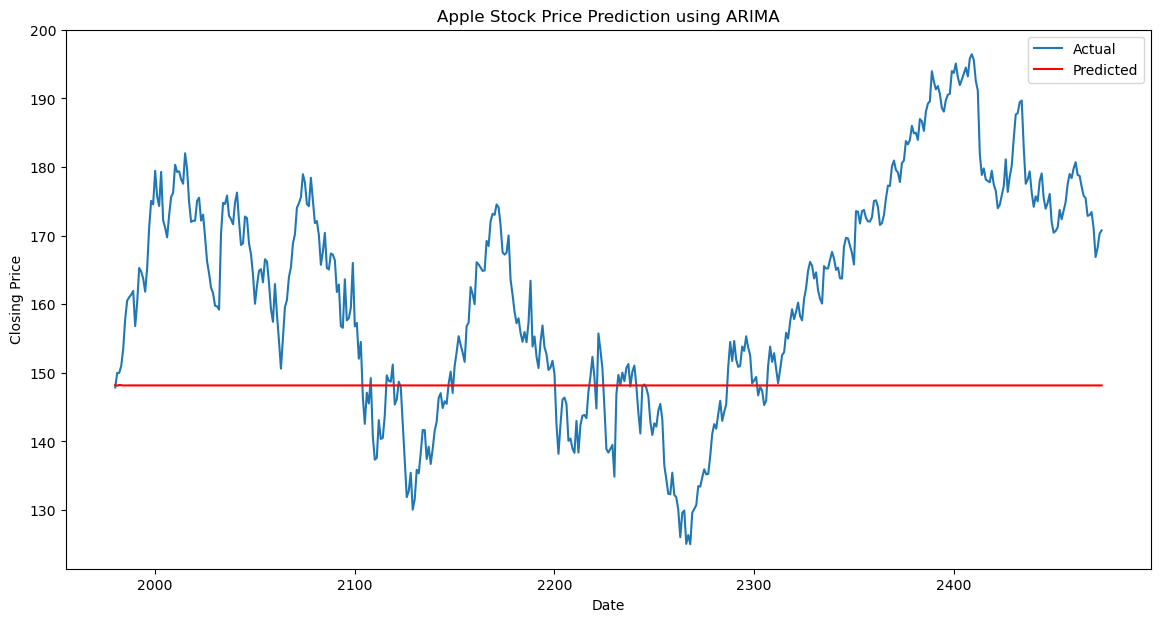

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, forecast, color='red', label='Predicted')
plt.title('Apple Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()